In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Mall_Customers.csv")

# Select relevant features
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmea

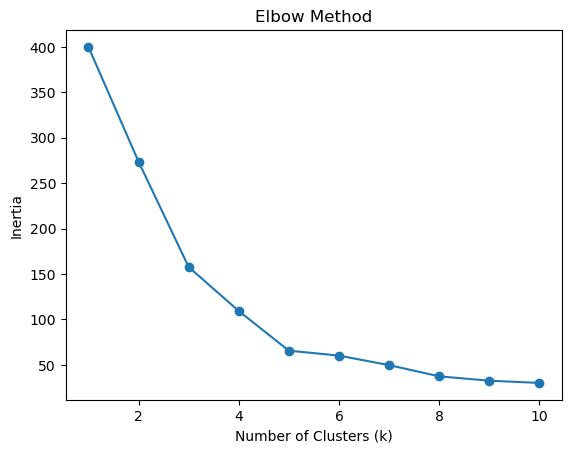

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the plot, choose the optimal k (e.g., k=5)
optimal_k = 5

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data["Cluster"] = kmeans.labels_

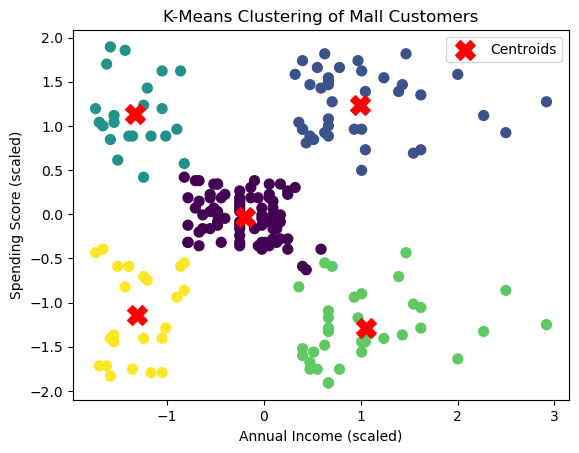

In [8]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering of Mall Customers")
plt.legend()
plt.show()

In [9]:
# Analyze each cluster
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

# Example interpretation:
# Cluster 0: Low income, low spending
# Cluster 1: High income, high spending
# Cluster 2: Low income, high spending
# Cluster 3: High income, low spending
# Cluster 4: Medium income, medium spending

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
